In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

/tmp/ipykernel_8000/344956980.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


8000
/media/work/docs/codes/QuCF/scripts-py


In [18]:
import pylib.mix as mix

# path_ = "../results/LKW-1D-results/"
# fname = path_ + "out_9_6_w1.4_Lx16_Lv4_flat.hdf5"

path_ = "../results/KIN1D1D-results/"
fname = path_ + "out_8_5_w1.2_Lx100_Lv4_exp_0005.hdf5"
# fname = path_ + "out_8_5_w1.2_Lx100_Lv4_exp_001.hdf5"
# fname = path_ + "w08/out_9_6_w0.8_Lx100_Lv4_tanh2.hdf5"


colors_ = ['b', 'r', 'g', 'gray', 'orange']

# cmap = 'seismic'
# cmap = 'bwr'
# cmap = 'jet'
# cmap = 'coolwarm'
cmap_one_sign_ = 'YlGn'
cmap_two_signs_= 'coolwarm'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [19]:
# ---------------------------------------------------
# --- Read background profiles ---
# ---------------------------------------------------
print(f"Reading the file {fname}...")
with h5py.File(fname, "r") as f:
    bg          = f["basic"]
    date_sim    = bg["date-of-simulation"][()].decode("utf-8")
    
    bg = f["grids"]
    x = np.array(bg["x"])
    v = np.array(bg["v"])
    rx = np.array(bg["rx"])
    rv = np.array(bg["rv"])
    
    bg = f["profiles"]
    n = np.array(bg["n"])
    T = np.array(bg["T"])
    der_n = np.array(bg["der-n"])
    der_T = np.array(bg["der-T"])
    b_temp = np.array(bg["b"])
    
    F = np.array(bg["F"])
    Y = np.array(bg["Y"])
    
print("date of the simulation: ", date_sim)

Nx = len(x)
Nv = len(v)
print("Nx = {:d}".format(Nx))
print("Nv = {:d}".format(Nv))

b = np.zeros(len(b_temp), dtype=complex)
for ii in range(len(b_temp)):
    temp_v1 = b_temp[ii]
    b[ii] = complex(temp_v1[0], temp_v1[1])
del b_temp, temp_v1

XX, YY = np.meshgrid(v, x)
Fxv = np.zeros((Nx,Nv))
Yxv = np.zeros((Nx,Nv))
for iv in range(Nv):
    for ix in range(Nx):
        Fxv[ix,iv] = F[ix*Nv+iv]
        Yxv[ix,iv] = Y[ix*Nv+iv]

Reading the file ../results/KIN1D1D-results/out_8_5_w1.2_Lx100_Lv4_exp_0005.hdf5...
date of the simulation:  05-15-2023 16:11:30
Nx = 256
Nv = 32


<IPython.core.display.Javascript object>


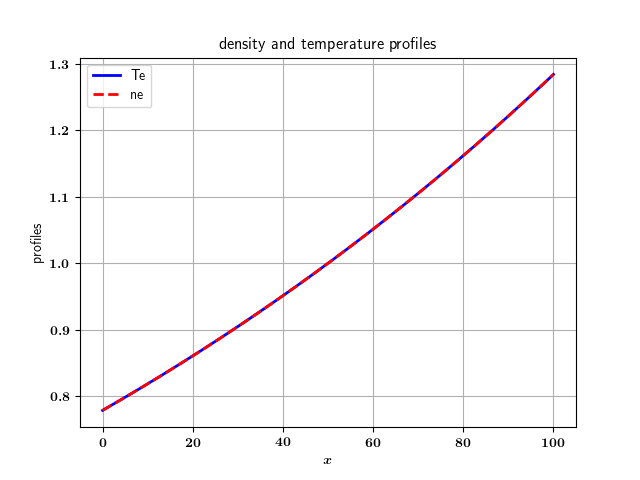

<IPython.core.display.Javascript object>


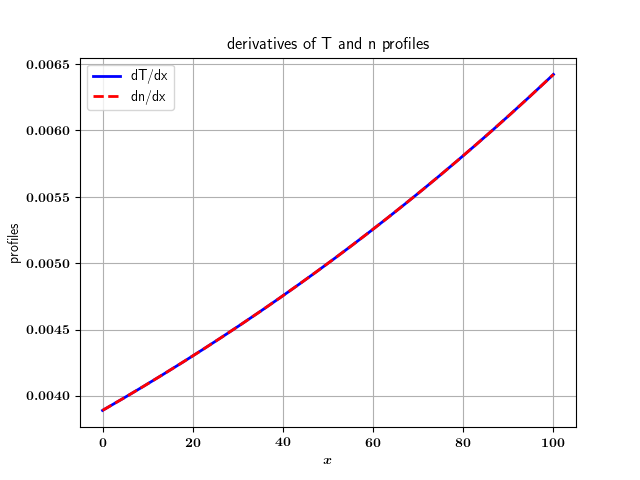

In [20]:
# --------------------------------------------------------
# --- Plot the temperature and density profiles ---
# --------------------------------------------------------
y_ref = np.exp(-(x-x[Nx//2-1])**2/0.4)
dy_ref = - (x - x[Nx//2-1])/0.2 * y_ref
    
fig_nT = plt.figure()
ax = fig_nT.add_subplot(111)
ax.plot(x, T, color='b', linewidth = 2, linestyle='-', label = "Te")
# ax.plot(x, y_ref, color='r', linewidth = 2, linestyle='--', label = "ref")
ax.plot(x, n, color='r', linewidth = 2, linestyle='--', label = "ne")
plt.xlabel('$x$')
plt.ylabel("profiles")
plt.title("density and temperature profiles")
ax.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, der_T, color='b', linewidth = 2, linestyle='-', label = "dT/dx")
# ax.plot(rx, dy_ref, color='r', linewidth = 2, linestyle='--', label = "ref")
ax.plot(x, der_n, color='r', linewidth = 2, linestyle='--', label = "dn/dx")
plt.xlabel('$x$')
plt.ylabel("profiles")
plt.title("derivatives of T and n profiles")
ax.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


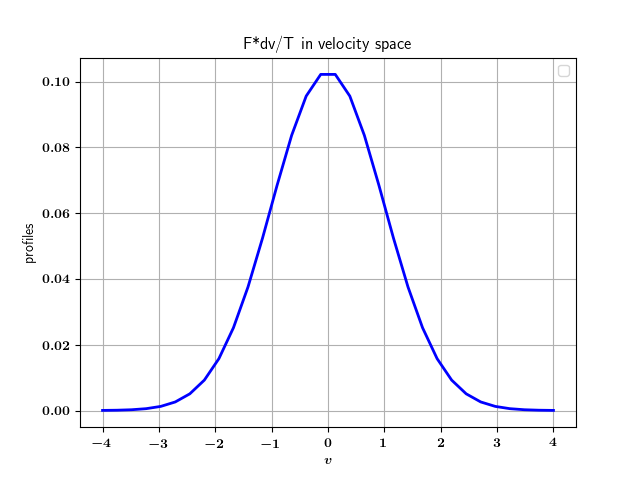

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


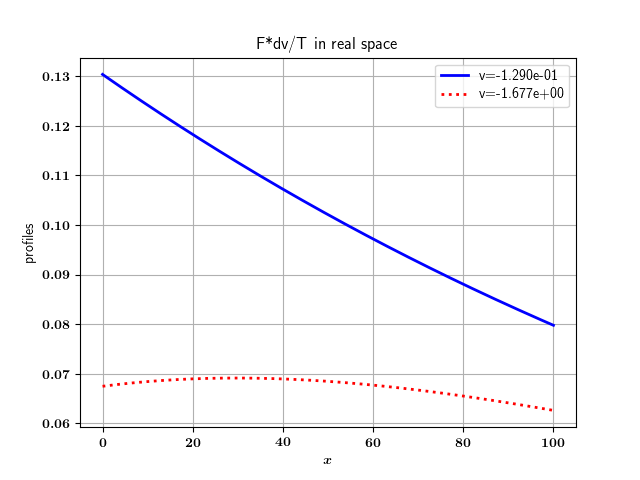

<IPython.core.display.Javascript object>


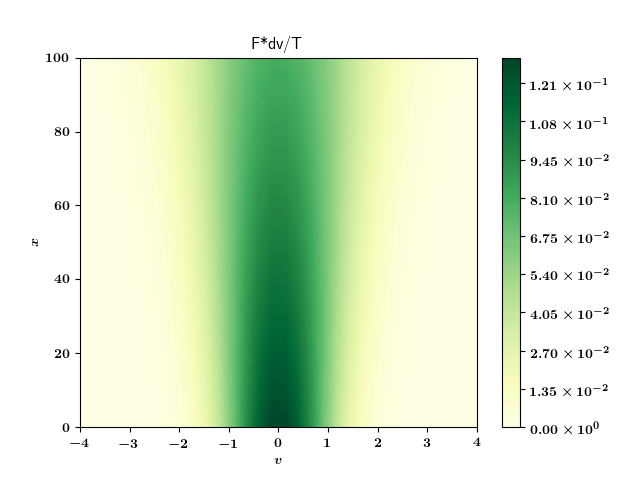

<IPython.core.display.Javascript object>


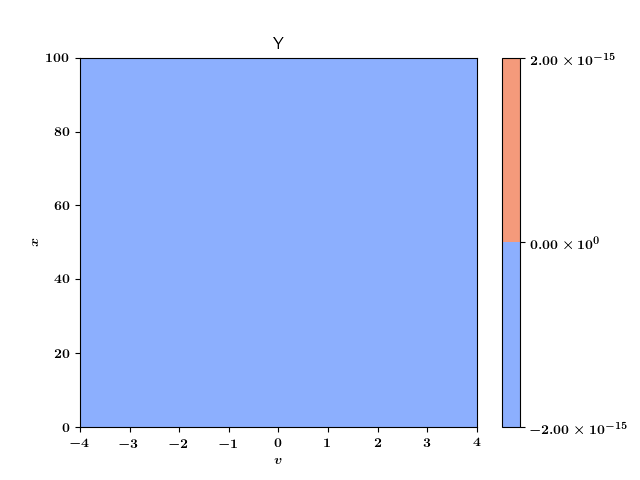

<IPython.core.display.Javascript object>


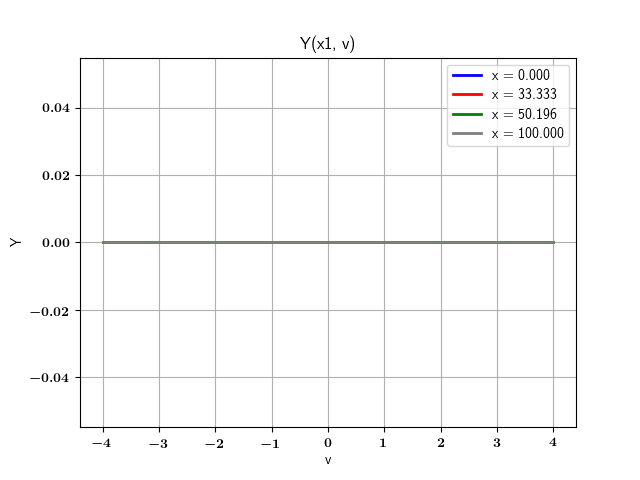

In [11]:
# --------------------------------------------------------
# --- Plot the distribution function and Y-profile ---
# --------------------------------------------------------
from matplotlib import ticker

# --- F(v) ---
fig_Fv = plt.figure()
ax = fig_Fv.add_subplot(111)
ax.plot(v, Fxv[Nx//2-1,:], color='b', linewidth = 2, linestyle='-')
plt.xlabel('$v$')
plt.ylabel("profiles")
plt.title("F*dv/T in velocity space")
ax.legend()
plt.grid(True)
plt.show()

# --- F(x) ---
fig_Fx = plt.figure()
ax = fig_Fx.add_subplot(111)
ax.plot(x, Fxv[:,Nv//2-1], color='b', linewidth = 2, linestyle='-', label="v={:0.3e}".format(v[Nv//2-1]))
ax.plot(x, Fxv[:,Nv//2-4], color='r', linewidth = 2, linestyle=':', label="v={:0.3e}".format(v[Nv//3-1]))
plt.xlabel('$x$')
plt.ylabel("profiles")
plt.title("F*dv/T in real space")
ax.legend()
plt.grid(True)
plt.show()

# --- F(x,v) ---
fig_Fxv = plt.figure()
ax = fig_Fxv.add_subplot(111)
cs = ax.contourf(XX, YY, Fxv, levels=100, cmap=cmap_one_sign_)
fig.colorbar(cs, ax = ax, format=ticker.FuncFormatter(fmt_))
ax.set_xlabel('$v$')
ax.set_ylabel('$x$')
ax.set_title('F*dv/T')

# --- Y(x, v) ---
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(XX, YY, Yxv, levels=100, cmap=cmap_two_signs_)
fig.colorbar(cs, ax = ax, format=ticker.FuncFormatter(fmt_))
ax.set_xlabel('$v$')
ax.set_ylabel('$x$')
ax.set_title('Y')

# --- Y(x1,v) ---
id_xs = [0, Nx//3, Nx//2, Nx-1]

fig = plt.figure()
ax = fig.add_subplot(111)
for ii in range(len(id_xs)):
    ix = id_xs[ii]
    ax.plot(
        v, Yxv[ix,:], 
        colors_[ii], linewidth = 2, linestyle='-', 
        label = "x = {:0.3f}".format(x[ix])
    )
plt.xlabel('v')
plt.ylabel("Y")
ax.legend()
plt.grid(True)
plt.title("Y(x1, v)")
plt.show()

del id_xs, ix

<IPython.core.display.Javascript object>


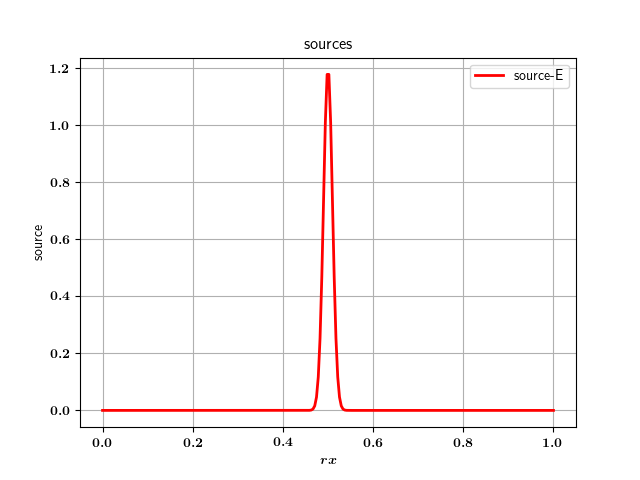

In [14]:
# -----------------------------------------------------------------------------------------------
# --- Plot the right-hand-side vector b: source in the plasma distribution and electric field ---
# -----------------------------------------------------------------------------------------------
iv_recheck = 1
source_g         = np.zeros(Nx, dtype=complex)
source_g_recheck = np.zeros(Nx, dtype=complex)
source_E         = np.zeros(Nx, dtype=complex)
source_E_recheck = np.zeros(Nx, dtype=complex)
for ix in range(Nx):
    source_g[ix]         = b[ix*Nv]
    source_g_recheck[ix] = b[ix*Nv + iv_recheck]
    source_E[ix]         = b[Nx*Nv + ix*Nv]
    source_E_recheck[ix] = b[Nx*Nv + ix*Nv + iv_recheck]
    
fig_source = plt.figure()
ax = fig_source.add_subplot(111)
# ax.plot(rx, np.real(source_g),         color='b', linewidth = 2, linestyle='-',  label = "source-g")
# ax.plot(rx, np.real(source_g_recheck), color='r', linewidth = 2, linestyle='--', label = "source-g-recheck")
ax.plot(rx, np.imag(source_E),         color='r', linewidth = 2, linestyle='-',  label = "source-E")
# ax.plot(rx, np.real(source_E_recheck), color='b', linewidth = 2, linestyle='--', label = "source-E-recheck")
plt.xlabel('$rx$')
plt.ylabel("source")
plt.title("sources")
ax.legend()
plt.grid(True)
plt.show()

In [18]:
# fig_maxw.savefig('/media/work/docs/codes/QuCF/results/LKW-1D-results/temp/' + "/maxwellian.eps")

fig_nT.savefig('/media/work/docs/codes/QuCF/results/LKW-1D-results/report-04-20-2023/' + "/nT.png")
fig_source.savefig('/media/work/docs/codes/QuCF/results/LKW-1D-results/report-04-20-2023/' + "/source.png")
fig_Fx.savefig('/media/work/docs/codes/QuCF/results/LKW-1D-results/report-04-20-2023/' + "/Fx.png")
fig_Fxv.savefig('/media/work/docs/codes/QuCF/results/LKW-1D-results/report-04-20-2023/' + "/Fxv.png")

In [12]:
# ---------------------------------------------------
# --- Print profiles ---
# ---------------------------------------------------
ih = 1./(2.*np.diff(x)[0])
ih3 = 3*ih

id_x = 0

print("v(3*sigma - Y[{:d}]):\t".format(id_x), v*(ih3 - Yxv[id_x,:])) 
print("4*v*sigma:\t\t", 4*v*ih)
print("v*sigma:\t\t", v*ih)
print("-v(3*sigma + Y[{:d}]):\t".format(id_x), - v*(ih3 + Yxv[id_x,:]))
print("vF[{:d}]:\n".format(id_x), v*Fxv[id_x,:])
print("vY[{:d}]:\n".format(id_x), v*Yxv[id_x,:])

del id_x

v(3*sigma - Y[0]):	 [-90.    -64.286 -38.571 -12.857  12.857  38.571  64.286  90.   ]
4*v*sigma:		 [-120.     -85.714  -51.429  -17.143   17.143   51.429   85.714  120.   ]
v*sigma:		 [-30.    -21.429 -12.857  -4.286   4.286  12.857  21.429  30.   ]
-v(3*sigma + Y[0]):	 [ 90.     64.286  38.571  12.857 -12.857 -38.571 -64.286 -90.   ]
vF[0]:
 [-3.761e-07 -6.802e-04 -7.582e-02 -3.444e-01  3.444e-01  7.582e-02
  6.802e-04  3.761e-07]
vY[0]:
 [-0. -0. -0. -0.  0.  0.  0.  0.]


In [12]:
np.diff(x)

array([1.429, 1.429, 1.429, 1.429, 1.429, 1.429, 1.429])

<IPython.core.display.Javascript object>


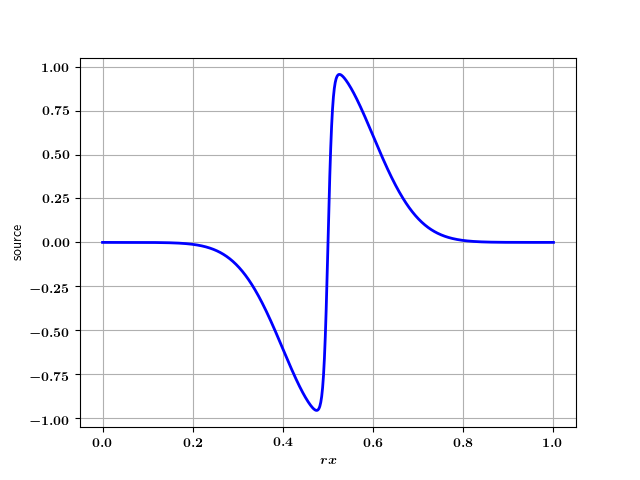

In [11]:
# --- Test source shape ---
a = 100
x0 = 0.5
w0 = 0.1
x = np.linspace(0,1,1001)

# source normalization !!!

# y_step = lambda x: 2. / ( 1. + np.exp(-a*(x-x0)) ) - 1.
y_step = lambda x: np.tanh(a*(x-x0))
y = lambda x: y_step(x) * np.exp(-pow(x-x0,2) / (2*pow(w0,2)))


fig_source = plt.figure()
ax = fig_source.add_subplot(111)
ax.plot(x, y(x), color='b', linewidth = 2, linestyle='-')
plt.xlabel('$rx$')
plt.ylabel("source")
plt.grid(True)
plt.show()

del a, x, y, x0, w0

<IPython.core.display.Javascript object>


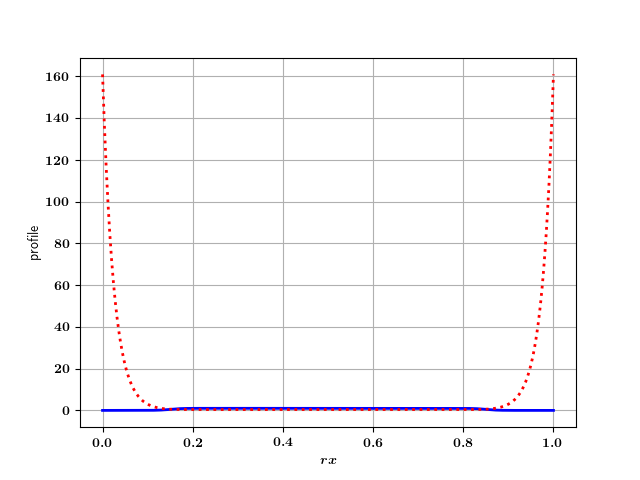

In [15]:
# --- Test background profiles ---
a = 40
x0_left = 0.15
x0_right = 0.85
x = np.linspace(0,1,1001)

y = lambda x: 0.5 * ( np.tanh(a*(x-x0_left)) - np.tanh(a*(x-x0_right)) )
yF = lambda x: y(x) / ( np.sqrt(2.*np.pi*y(x)) )
yFdT = lambda x: yF(x) / y(x)

fig_source = plt.figure()
ax = fig_source.add_subplot(111)
ax.plot(x, y(x), color='b', linewidth = 2, linestyle='-')
ax.plot(x, yFdT(x), color='r', linewidth = 2, linestyle=':')
plt.xlabel('$rx$')
plt.ylabel("profile")
plt.grid(True)
plt.show()

del a, x, y, x0_left, x0_right